In [1]:
import pathlib
import seaborn as sns
import utils
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn.impute

In [2]:
url = 'https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake1/sens/insert/'

df = utils.get_all_pages(url)



In [3]:
df.head()

,entry_id,insert_time,sensor_id,value1,unit1
0,2291,2022-03-30T14:49:51.283Z,CIRCUITPY323d,785.0,PPM
1,2304,2022-03-30T14:56:37.668Z,CIRCUITPY323d,27.4,C
2,2307,2022-03-30T14:57:37.983Z,CIRCUITPY323d,27.4,C
3,2311,2022-03-30T14:58:40.293Z,CIRCUITPY323d,31.1,%
4,2328,2022-03-30T15:04:41.298Z,CIRCUITPY323d,27.7,C


In [4]:
#convert inser_time to timedate
df['insert_time'] = pd.to_datetime(df['insert_time'])
#and add 2 hours to insert time
df['insert_time'] = df['insert_time'] + pd.Timedelta(hours=2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130952 entries, 0 to 130951
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   entry_id     130952 non-null  int64              
 1   insert_time  130952 non-null  datetime64[ns, UTC]
 2   sensor_id    130952 non-null  object             
 3   value1       130952 non-null  float64            
 4   unit1        130952 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
#pivot
df_pivot = df.pivot_table(index='insert_time',columns=['sensor_id','unit1'],values='value1')
#multindex to single index
df_pivot.columns =	df_pivot.columns.map('_'.join)
#resample on 5min time windows


#calculate slope for each tiem window



df_pivot = df_pivot.resample('5Min').agg({
                                            'CIRCUITPY323d_PPM':'mean', 
                                            'CIRCUITPY323d_C':'mean',
                                            'CIRCUITPY323d_%':'mean',
                                            'CIRCUITPY825a_Window':'last',
                                            'CIRCUITPYbec9_Person':'last'
                                            })
df_pivot.head(30)

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
insert_time,,,,,
2022-03-24 16:00:00+00:00,1069.450000,26.475000,33.500000,0.0,NaN
2022-03-24 16:05:00+00:00,1125.720000,26.400000,34.670000,NaN,NaN
2022-03-24 16:10:00+00:00,1272.466667,26.466667,36.500000,NaN,NaN
2022-03-24 16:15:00+00:00,1440.240000,26.570000,38.030000,NaN,NaN
2022-03-24 16:20:00+00:00,1299.600000,26.670000,35.260000,1.0,NaN
2022-03-24 16:25:00+00:00,723.007692,26.407692,27.007692,0.0,NaN
2022-03-24 16:30:00+00:00,910.083333,26.466667,29.891667,NaN,NaN
2022-03-24 16:35:00+00:00,1150.200000,26.655556,33.211111,1.0,NaN
2022-03-24 16:40:00+00:00,1195.450000,26.750000,32.983333,NaN,NaN


In [6]:
#neue Variable die die Luftqualität Quantitativ einordnet
df_pivot['air_quality'] =np.where(df_pivot['CIRCUITPY323d_PPM']>600, 'good',
                   np.where(df_pivot['CIRCUITPY323d_PPM']>1000, 'ok',
                   np.where(df_pivot['CIRCUITPY323d_PPM']>1400, 'bad', 'top')))


In [23]:
#select specific time window
df_timewindow = df_pivot.loc['2022-04-14 00:00:00':'2022-04-30 23:50:00']

In [24]:
#Fill Nan for window sensor
df_timewindow['CIRCUITPY825a_Window'].fillna(method='ffill',inplace=True)
df_timewindow['CIRCUITPY825a_Window'].fillna(method='bfill',inplace=True)
#Fill Nan for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='ffill',inplace=True)
#Fill Nan for first entry for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='bfill',inplace=True)

df_timewindow.head(5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-14 00:00:00+00:00,694.84,25.7,44.96,0.0,0.0,good
2022-04-14 00:05:00+00:00,695.16,25.7,44.90,0.0,0.0,good
2022-04-14 00:10:00+00:00,695.18,25.7,44.86,0.0,0.0,good
2022-04-14 00:15:00+00:00,696.00,25.7,44.80,0.0,0.0,good
2022-04-14 00:20:00+00:00,692.90,25.7,44.75,0.0,0.0,good


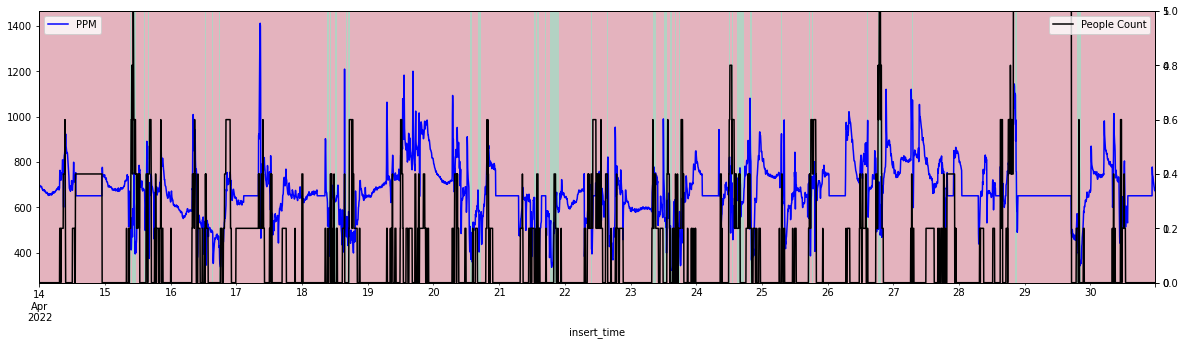

In [25]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow['CIRCUITPY323d_PPM'].plot(kind='line',color='blue',label='PPM', grid=False)
ax3 = ax1.twinx()
#ax3 = df_timewindow['CIRCUITPY323d_C'].plot(kind='line',color='red',label='C', grid=False,ylim=(0,30))
#ax4 = ax1.twinx()
#ax4 = df_timewindow['CIRCUITPY323d_%'].plot(kind='line',color='green',label='%', grid=False,ylim=(20,60))
ax2 = ax1.twinx()
ax2 = df_timewindow['CIRCUITPYbec9_Person'].plot(kind='line',color='black',label='People Count',ylim=(0,5))
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
#ax3.legend(loc='center right')
#ax4.legend(loc='lower right')
#additonal legend for window sensor


plt.show()

In [10]:
#fill nas for PPM  with sklean.impute KNN imputation
Simple_Imputer = sklearn.impute.SimpleImputer(strategy='mean')
df_timewindow['CIRCUITPY323d_PPM'] = Simple_Imputer.fit_transform(df_timewindow['CIRCUITPY323d_PPM'].values.reshape(-1,1))


/var/folders/v2/51sbk7ln57325w479zxv0dqc0000gn/T/ipykernel_1554/832959074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow['CIRCUITPY323d_PPM'] = Simple_Imputer.fit_transform(df_timewindow['CIRCUITPY323d_PPM'].values.reshape(-1,1))


In [26]:
#calculate correleation between two columns
df_timewindow.corr(method="spearman")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.263648,0.542538,-0.252948,-0.008841
CIRCUITPY323d_C,0.263648,1.000000,0.168257,-0.127108,0.190390
CIRCUITPY323d_%,0.542538,0.168257,1.000000,-0.225897,-0.098095
CIRCUITPY825a_Window,-0.252948,-0.127108,-0.225897,1.000000,0.112060
CIRCUITPYbec9_Person,-0.008841,0.190390,-0.098095,0.112060,1.000000


In [12]:
#calculate correleation between two columns
df_timewindow.corr(method="pearson")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.354804,0.397372,-0.343245,0.037878
CIRCUITPY323d_C,0.354804,1.000000,0.268702,-0.222114,0.172828
CIRCUITPY323d_%,0.397372,0.268702,1.000000,-0.207945,-0.135107
CIRCUITPY825a_Window,-0.343245,-0.222114,-0.207945,1.000000,0.047668
CIRCUITPYbec9_Person,0.037878,0.172828,-0.135107,0.047668,1.000000


Janis Ideen data wrangling

In [13]:
df_timewindow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6335 entries, 2022-04-14 00:00:00+00:00 to 2022-05-05 23:50:00+00:00
Freq: 5T
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CIRCUITPY323d_PPM     6335 non-null   float64
 1   CIRCUITPY323d_C       5320 non-null   float64
 2   CIRCUITPY323d_%       5319 non-null   float64
 3   CIRCUITPY825a_Window  6335 non-null   float64
 4   CIRCUITPYbec9_Person  6335 non-null   float64
 5   air_quality           6335 non-null   object 
dtypes: float64(5), object(1)
memory usage: 346.4+ KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


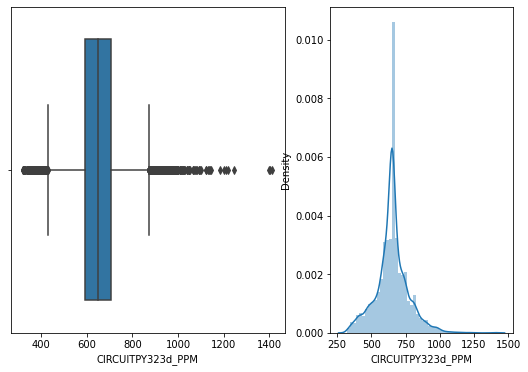

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


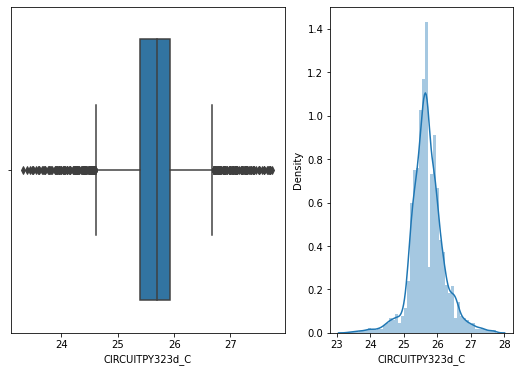

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


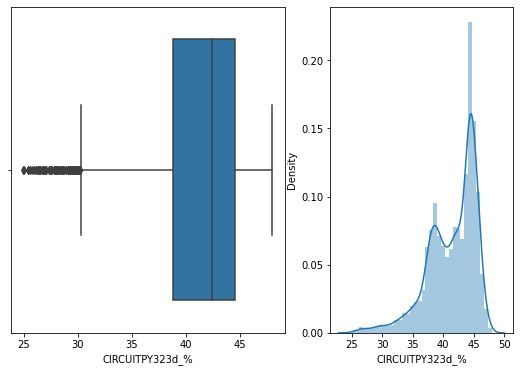

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


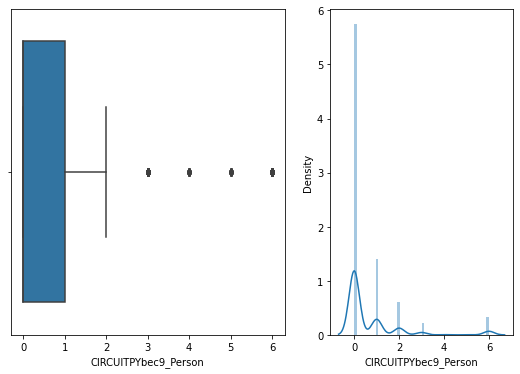

In [14]:
#detect outliers in PPM data
#print boxlot
utils.overview(df_timewindow, "CIRCUITPY323d_PPM")
utils.overview(df_timewindow, "CIRCUITPY323d_C")
utils.overview(df_timewindow, "CIRCUITPY323d_%")
utils.overview(df_timewindow, "CIRCUITPYbec9_Person")

In [15]:
print(df_timewindow['CIRCUITPY323d_PPM'].max())
print(df_timewindow['CIRCUITPY323d_PPM'].min())

1411.75
322.02


<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

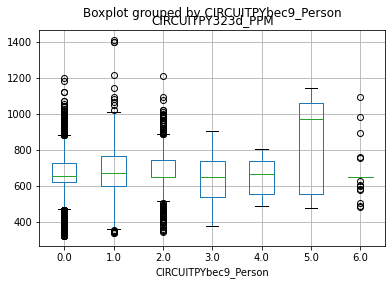

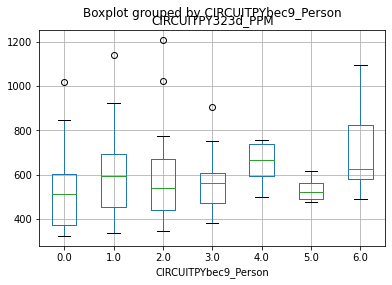

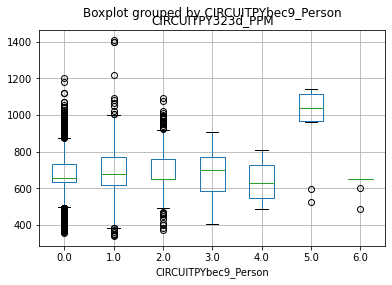

In [27]:
#group per persons and give the average value
df_timewindow.groupby('CIRCUITPYbec9_Person').mean()

#plot boxplot per group for PPM
df_timewindow.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

#splitt dataframe where window sensor is 1 and 0
df_timewindow_1 = df_timewindow[df_timewindow['CIRCUITPY825a_Window']==1]
df_timewindow_0 = df_timewindow[df_timewindow['CIRCUITPY825a_Window']==0]

#splitt dataframe where window sensor is 0 and person is greater than 0
df_timewindow_0_person = df_timewindow_0[df_timewindow_0['CIRCUITPYbec9_Person']>0]

df_timewindow_1.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')
df_timewindow_0.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')







<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

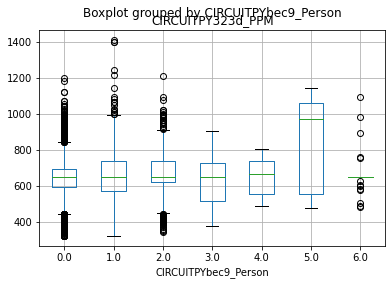

In [17]:
df_timewindow.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window
CIRCUITPYbec9_Person,,,,
0.0,658.650000,25.60,42.620000,0.0
1.0,676.740000,25.70,40.660000,0.0
2.0,650.875623,25.89,41.040000,0.0
3.0,700.141667,25.90,41.266667,0.0
4.0,629.280000,25.88,42.320000,0.0
5.0,1039.580000,27.36,45.220000,0.0
6.0,650.875623,26.20,36.225000,0.0


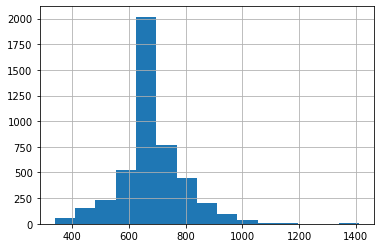

In [29]:
# group PPM in 100 bins
df_timewindow_0['CIRCUITPY323d_PPM'].hist(bins=15)

#what is the median person in those bins
df_timewindow_0.groupby('CIRCUITPYbec9_Person').median()
